OSCILADOR ARMÓNICO AMORTIGUADO FORZADO

In [593]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import scipy as scipy
from math import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


PARÁMETROS DEL SISTEMA

In [594]:
# Condiciones iniciales

x_0 = 1 # Posición inicial (arb)
v_0 = 0 # Velocidad inicial (arb)

# Definiciones iniciales

w_0 = 0.5 # Frecuencia natural x>0
W_0 = 100 # Frecuencia natural x<0
amort = 0.125 # constante de amortiguamiento
f_0 = 0.25 # Amplitud de la fuerza por unidad de masa

DEFINIMOS UNA FRECUENCIA NATURAL DEL OSCILADOR QUE DEPENDE DE LA POSICIÓN

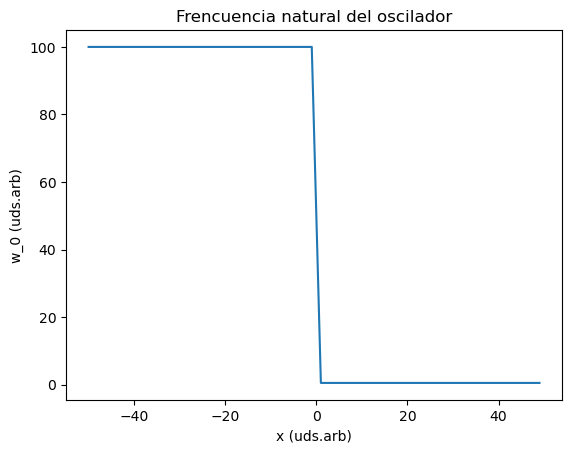

In [595]:
def W(x): # frecuecia angular
    return W_0 - (W_0-w_0)*np.heaviside(x,w_0)

plt.plot(range(-50,50),W(range(-50,50))) # Representación gráfica de la frecuencia natural
plt.title('Frencuencia natural del oscilador')
plt.xlabel('x (uds.arb)')
plt.ylabel('w_0 (uds.arb)')
plt.show()

ECUACIÓN DIFERENCIAL

In [596]:
def EDO(t,y,w):
    x,v = y
    return [v,-2*amort*v-W(x)**2*x+f_0*np.cos(w*t)]

CÁLCULO DEL MOVIMIENTO DEL SISTEMA

Frencuencia angular de la fuerza externa

In [597]:
dw = 0.001 # paso en la frecuencia externa
w =  np.array([i*dw for i in range(int(12*0.1/dw),int(1.6/dw)+1)]) # Frecuencia fuerza externa

Integración de la EDO

In [598]:
dt = 0.001 # Paso de tiempo
tf = 5000 # Tiempo de medida (se asume que t0 = 0)
t = np.linspace(0,tf,int(tf/dt)) # Vector de instantes de tiempo

pos = []
vel = []
xp = []
vp = []

for i in range(np.size(w)):
    sol = scipy.integrate.solve_ivp(EDO, [0,tf], [x_0,v_0], method = 'RK23',t_eval = t,args = [w[i]])
    x,v = sol.y
    pos.append(x)
    vel.append(v)

    T = 2*pi/w[i] # Periodo fuerza externa
    n = int(tf/T) # Número de puntos del diagrama de Poincaré
    ind = np.array([np.searchsorted(t,T*(i+1)) for i in range(n-1)]) # Calculamos los índices del diagrama de Poincaré
    xp.append(x[ind]) # Asignamos índices encontrados en tiempos con posiciones y velocidades (/max(x[ind]))
    vp.append(v[ind])

DIAGRAMA DE BIFURCACIÓN DEL OSCILADOR

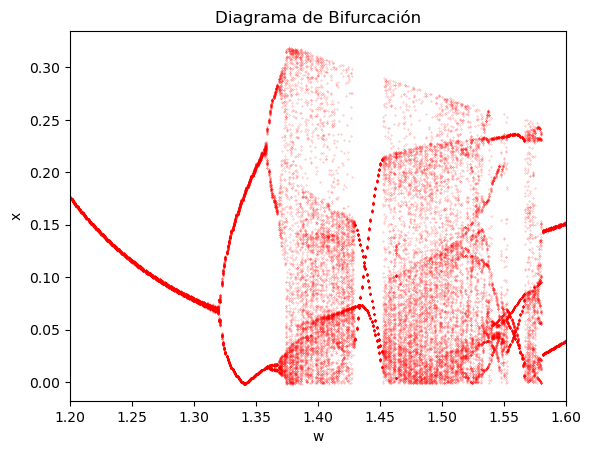

In [599]:
num = 100 # Número de puntos representados por cada w
for i in range(w.size):
    plt.plot(w[i]*np.ones(num),np.array(xp[i],dtype=object)[-num:],'.',color='red',markersize='0.5',alpha=0.5)
plt.ylabel('x')
plt.xlabel('w')
plt.xlim(min(w),max(w))
plt.title('Diagrama de Bifurcación')
plt.show()

DIMENSIÓN FRACTAL

Método de Box Counting

In [600]:
def FractalDimension(xp,vp,w):
    fig = plt.figure()
    plt.plot(xp[50:],vp[50:],'.',color='red',markersize='1')
    plt.axis('off')
    plt.xlim([min(xp)-0.1,max(xp)])
    plt.ylim([min(vp)-0.1,max(vp)])
    plt.savefig('Poincaré w = '+str(w)+'.png', transparent=True)
    plt.close(fig)
    image = plt.imread('Poincaré w = '+str(w)+'.png')[:,:,3]
    
    Lx = image.shape[0]
    Ly = image.shape[1]
    pixels=[]
    Ns=[]
    E = np.logspace(0, 2, num = 100, endpoint=False, base=2)
    #E = [0.01,0.1,0.5,1,2,4,8,16,32]

    for i in range(Lx):
        for j in range(Ly):
            if image[i,j] > 0:
                pixels.append((i,j))

    pixels=np.array(pixels)
    
    for eps in E:
        Box, ejes = np.histogramdd(pixels, bins=(np.arange(0,Lx,eps),np.arange(0,Ly,eps)))
        Ns.append(np.sum(Box>0))
    fig2 = plt.figure()
    plt.plot(np.log(E),np.log(Ns),'.')
    plt.close(fig2)
    sol = np.polyfit(np.log(E),np.log(Ns),1,full=True)
    dF = -sol[0][0]
    r = sol[1]
    
    if r > 0.2:
        return nan
    else:
        return dF

Cálculo de la dimensión fractal

In [601]:
df = []

for i in range(np.size(w)):
    dF = FractalDimension(xp[i],vp[i],w[i])
    df.append(dF)

Representación gráfica de resultados

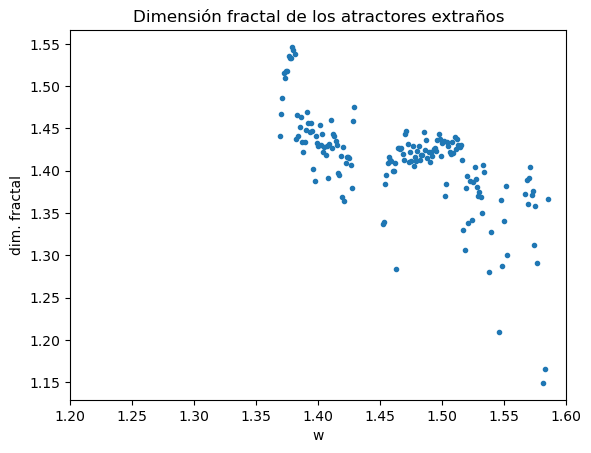

In [602]:
plt.plot(w,df,'.')
plt.title('Dimensión fractal de los atractores extraños')
plt.xlabel('w')
plt.ylabel('dim. fractal')
plt.xlim(min(w),max(w))
plt.show()

EXPONENTES DE LIAPUNOV

DISTRIBUCIÓN DE INTERVALOS DE TIEMPO

¿CÚANDO APARECE EL CAOS?